# Thinking probabilistically-- Continuous variables

### The Normal PDF

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

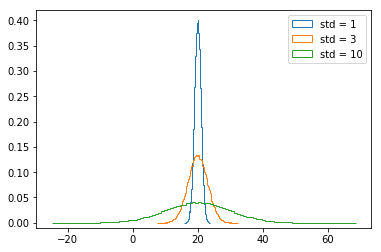

In [7]:
plt.hist(samples_std1, density=True, histtype='step', bins=100)
plt.hist(samples_std3, density=True, histtype='step', bins=100)
plt.hist(samples_std10, density=True, histtype='step', bins=100)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### The Normal CDF

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [5]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

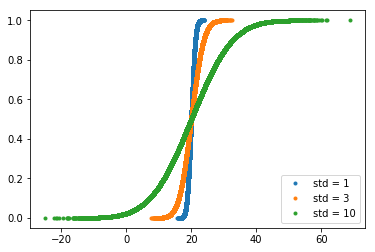

In [14]:
plt.plot(x_std1, y_std1, linestyle='none', marker='.')
plt.plot(x_std3, y_std3, linestyle='none', marker='.')
plt.plot(x_std10, y_std10, linestyle='none', marker='.')

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Are the Belmont Stakes results Normally distributed?

In [16]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

In [17]:
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

In [22]:
np.random.seed(42)
samples = np.random.normal(mu, sigma, 10000)

In [23]:
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

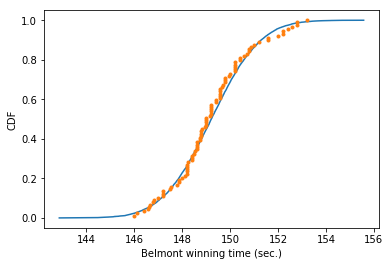

In [24]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

### What are the chances of a horse matching or beating Secretariat's record?

In [25]:
samples = np.random.normal(mu, sigma, 1000000)
prob = np.sum(samples <= 144)/1000000
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000593


### If you have a story, you can simulate it!

In [26]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles

In [27]:
waiting_times = successive_poisson(764, 715, 100000)

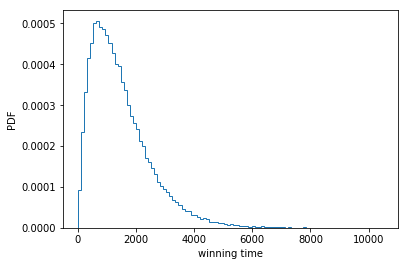

In [30]:
plt.hist(waiting_times, bins=100, density=True, histtype='step')
_ = plt.xlabel('winning time')
_ = plt.ylabel('PDF')
plt.show()